## 1. Understand the data.
<p>In this project, we will delve into the exciting journey of machine learning by applying predictive analytics to solve a real-world problem: health monitorig application. In this exeriment, we will demonstrate in building and evaluating machine learning models using Python and popular libraries such as scikit-learn.</p>
<p>Step 1: As usual, understanding the data is the first step of our health monitoring application project.</p>

In [62]:
# Importing the pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Importing the one hot encoding


# Reading in condo.csv, which is comma delimited.
# df=pd.read_csv('condo.csv', index_col = 0)
df=pd.read_csv('../dataset/health_data.csv')

df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         300 non-null    int64  
 1   Age             300 non-null    int64  
 2   Gender          300 non-null    int64  
 3   Weight_kg       300 non-null    float64
 4   Height_cm       300 non-null    float64
 5   SpO2            300 non-null    float64
 6   BPM             300 non-null    float64
 7   Recommendation  300 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 18.9 KB


In [63]:

# # Encode categorical variables
# label_encoder = LabelEncoder()
# df['Gender'] = label_encoder.fit_transform(df['Gender'])
# df['Recommendation'] = label_encoder.fit_transform(df['Recommendation'])  # Target variable
# df.info()

In [64]:
# Define features and target
X = df[['Age', 'Gender', 'Weight_kg', 'Height_cm', 'SpO2', 'BPM']]
y = df['Recommendation']

In [65]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [66]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.98      1.00      0.99        47

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60



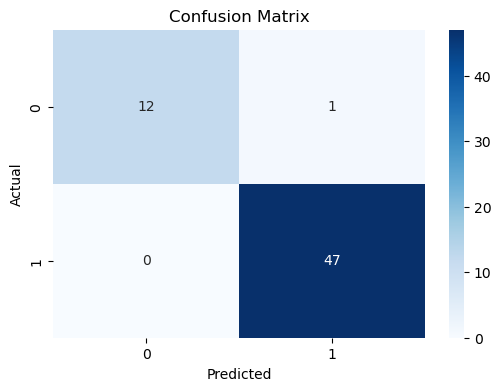

In [68]:

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 2. Data Splitting 
<p>Data splitting, also known as data partitioning or data splitting, is a crucial step in machine learning model development. It involves dividing a dataset into multiple subsets for different purposes, typically training and testing/validation. </p>


In [56]:
# select the dependent and target
# sel_feature = ['Area', 'Bedroom']
sel_feature = ['User_ID', 'Age','Gender','Weight_kg','Height_cm','SpO2','BPM']
# sel_feature = ['Area', 'Bedroom','Bathroom','Floor']

X=df[sel_feature].values
y=df['Recommendation_Stop'].values

# Import the libary to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.3, 
                                                    random_state=42)


# Print the size of the training and testing data
print(X_train.shape, X_test.shape)


KeyError: 'Recommendation_Stop'

## 3. Use scikit-learn pipeline 
<p>Pipelines allow for the seamless integration of multiple preprocessing steps (e.g., feature scaling, imputation) and the model training process into a single object. This simplifies the overall workflow and reduces the likelihood of errors or inconsistencies in data preprocessing and modeling steps.</p>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


steps = [('scaler', StandardScaler()), 
         ('poly', PolynomialFeatures(degree = 5, 
                                     include_bias=False)),
         ('liReg', LinearRegression())]

parameters = {"poly__degree":[2, 3, 4, 5, 6, 7, 8, 9]}
# parameters = {"poly__degree":[4]}
pipeline = Pipeline(steps)


poly_grid = GridSearchCV(pipeline, parameters, 
                         cv=5, 
                         scoring='neg_mean_squared_error',
                         verbose= True) 

poly_grid.fit(X_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 878, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 914, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'U0169'

--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 878, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 914, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'U0195'


## 4. Check the parameters
<p>Retrieves the value of the parameters corresponding to the minimum cost.</p>

In [ ]:
best_parameters = poly_grid.best_params_

# print the values of the parameters 
print ('best order is :', best_parameters)



best order is : {'poly__degree': 2}


## 5. Perform the predictions
<p>Now that we have identified the best parameters corresponding to the minimum cost. Make predictions using the function <b>predict</b> from Python scikit-learn moduel</p>

In [ ]:
import numpy as np

# predict the sales for the testing data
ytest_pred = poly_grid.predict(X_test)

#predict the sales for the training data
ytrain_pred = poly_grid.predict(X_train)

#compare values
df_train_result =pd.DataFrame({'Actual': y_train, 'Predict_values': np.round(ytrain_pred) })
df_train_result

,Actual,Predict_values
0,1620000,1122793.0
1,1627249,531221.0
2,3200000,7245320.0
3,7000000,6727402.0
4,11900000,10595286.0
...,...,...
135,1900000,1518369.0
136,8500000,5906871.0
137,799174,603830.0
138,1050000,1646085.0


## 6. Visualize the results.
<p>Draw a scatter plot to visualize the relationship between the selected program variable (sel_feature) and the sales data, along with the predicted sales based on the best parameters.</p>

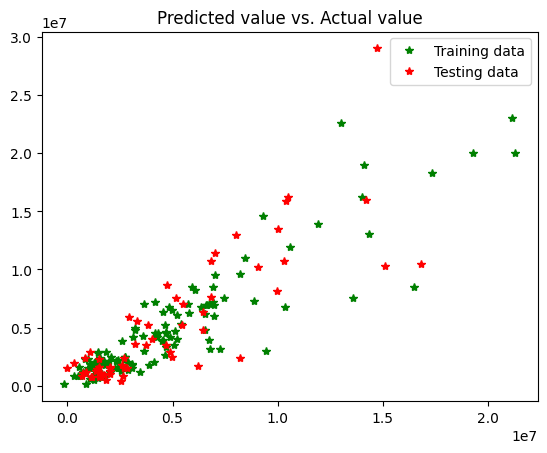

In [ ]:
# import matplotlib for visualization

import matplotlib.pyplot as plt

plt.plot(ytrain_pred,  y_train, 'g*')
plt.plot(ytest_pred,  y_test, 'r*')

plt.title("Predicted value vs. Actual value")
plt.legend(["Training data", "Testing data"])
plt.show()

Text(0, 0.5, 'error')

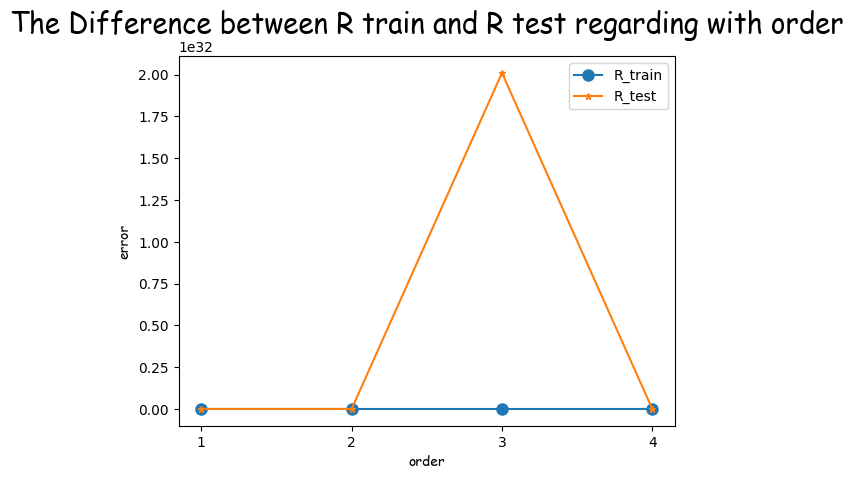

In [ ]:
df2 = pd.read_csv('order_vs_error.csv')

#type (df2)

#df2.info
# np.round(df2.R_Test.iloc[2])
# type(df2.R_Test.iloc[2])
# plt.plot(df2.Order,np.round(df2.R_Train) , marker ='o',markersize = '8' )
# plt.plot(df2.Order,np.round(df2.R_Test), marker='*',markersize = '5')
plt.plot(df2.Order,df2.MSE_Train , marker ='o',markersize = '8' )
plt.plot(df2.Order,df2.MSE_Test , marker='*',markersize = '5')
# plt.yticks([0,1496319,-2,-3.4736])
plt.xticks([1,2,3,4])
plt.legend(['R_train','R_test'])
plt.title("The Difference between R train and R test regarding with order",fontdict={'fontname' : 'Comic Sans MS','fontsize' : 20})
plt.xlabel("order",fontdict={'fontname' : 'Comic Sans MS','fontsize' : 10})
plt.ylabel("error",fontdict={'fontname' : 'Comic Sans MS','fontsize' : 10})

## 7. Evaluate the results using metrics

<p>Evaluating the performance of the trained linear regression model is crucial for assessing model fit, detecting overfitting, understanding prediction accuracy, comparing models, iteratively improving the model, and establishing baseline performance. </p>
<p>The model's performance should be evaluated on both the trained data and test data sets for ensuring model effectiveness and generalization ability.</p>

In [ ]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# evauate on the training set
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

# evauate on the testing set
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  1205656.3647791364
Mean squared error:  3545625447884.139
R2 score is:  0.8340847127527138
Mean absolute error:  1945776.3166063756
Mean squared error:  9126386477820.574
R2 score is:  0.6865416874567272


## 8. Submit for the grade.
<p>Change the below cell code for the final submission</p>

In [ ]:
# Edit the below code to submit. 
import pandas as pd
# name = "Than Zaw Toe"
name = "Group-A"
print("Submitted by", name)

poly_mse_all_features = [2805709669072, 8512393301917] # train_score, test_score
poly_mae_all_features = [1031579, 1864776] # train_score, test_score
best_degree_all_features = 2 # change to yours

linear_mse_all_features = [4596575908123, 8035165565427] # train_score, test_score
linear_mae_all_features = [1313270, 1666017] # train_score, test_score

selected_feautres = ['Area', 'Bedroom' , 'Bathroom' , 'Floor', 'Furnish'] # change your selections
poly_mse_sel_fea = [3545625447884.139, 9126386477820.574] # train_score, test_score
poly_mae_sel_fea = [1205656.3647791364, 1945776.3166063756] # train_score, test_score
best_degree_sel_features = 2 # change to yours

linear_mse_sel_fea = [5542128792847, 10011299480294] # train_score, test_score
linear_mae_sel_fea = [1511473, 2046095] # train_score, test_score


## do not change the below codes: 
print(f"The best poly degree using all featurs is {best_degree_all_features}")
print(f"The features selected are: {selected_feautres}")
print(f"The best degree using selected featurs is {best_degree_sel_features}")
variable_names = [
    "poly_mse_all_features",
    "poly_mae_all_features",
    "linear_mse_all_features",
    "linear_mae_all_features",
    "poly_mse_sel_fea",
    "poly_mae_sel_fea",
    "linear_mse_sel_fea",
    "linear_mae_sel_fea"
]

values  = [globals()[name] for name in variable_names]
tr_result = [val[0] for val in values]
test_result =  [val[1] for val in values]
df = pd.DataFrame(index = variable_names)
df['Train']= tr_result
df['Test']= test_result

Submitted by Group A
The best poly degree using all featurs is 2
The features selected are: ['Area', 'Bedroom', 'Bathroom', 'Floor', 'Furnish']
The best degree using selected featurs is 2
